## Practical Work (TD #2): Support Vector Machines on the Penguins Dataset

**Dataset:** Seaborn Penguins dataset containing physical measurements of Adelie, Chinstrap, and Gentoo penguins.  

**Models:** Support Vector Machine (SVM)

**Goal:** To classify penguin species using SVM, analyze feature separability, apply preprocessing and visualization, evaluate performance, and understand the impact of kernel choice and hyperparameter tuning.


1. Apply Support Vector Machines (SVM) to classify penguin species based on body measurements.
2. Explore: 
    - preprocessing
    - visualization
    - model training
    - evaluation 
    - hyperparameter tuning.

### Dataset
* We’ll use Seaborn’s penguins dataset, which contains data about three penguin species:
    - Adelie
    - Chinstrap
    - Gentoo
* Each sample includes physical characteristics like bill length, flipper length, and body mass.

In [1]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning model
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




##  Step 1 — Load and Explore the Dataset

**Import libraries:**

In [2]:
# Step 1: Load penguins dataset from Seaborn
df = pd.read_csv('penguins.csv')

# Quick look at the data
print(df.head())
print(df.info())
print(df.isnull().sum()) 

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      3

### Step 2 — Encode and Visualize the Data

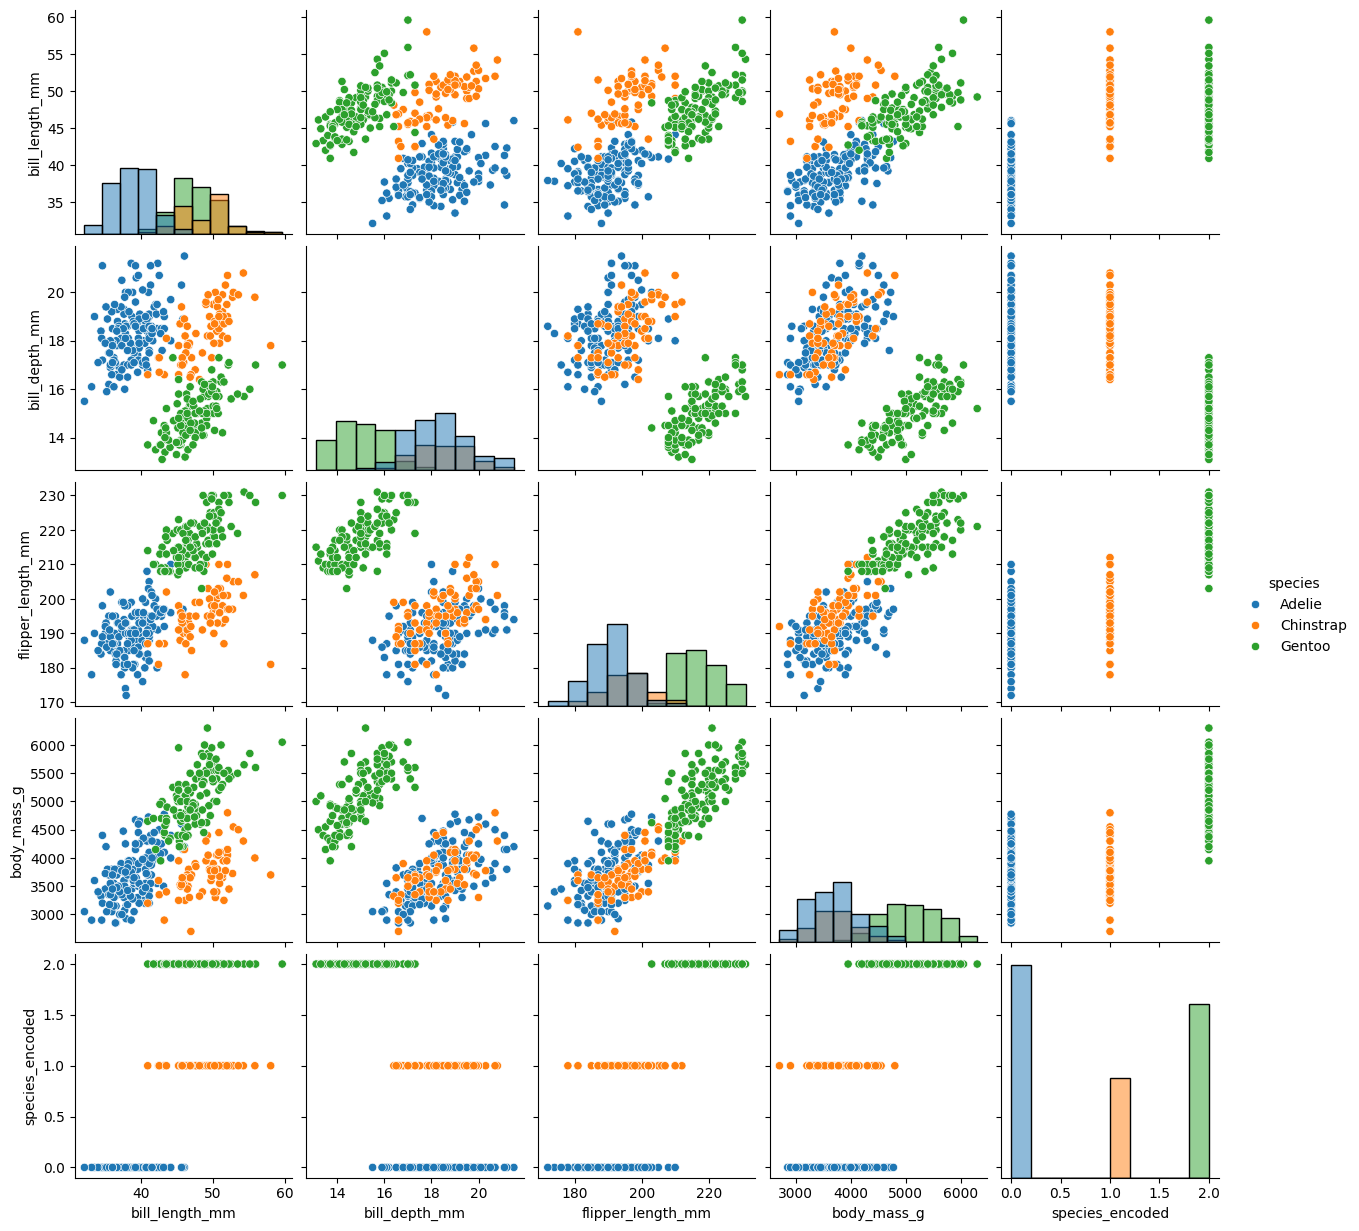

In [ ]:
# Step 2: Encode target variable
le = LabelEncoder()
penguins = sns.load_dataset('penguins')

# Drop rows with missing values for simplicity
penguins = penguins.dropna()

# Encode species as numeric
penguins['species_encoded'] = le.fit_transform(penguins['species'])

# Features and target
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]
y = penguins['species_encoded']

#Visualize data with pairplot
sns.pairplot(penguins, hue='species', diag_kind='hist')
plt.show()



Question:

**Q1**: Do you observe overlap between species?

Gentoo penguins are well-separated, but Adelie and Chinstrap overlap in bill and flipper measurements, indicating that a non-linear SVM may perform better.

**Q2**:Which features seem most discriminative?

Flipper length and bill length seem most discriminative, as they clearly separate Gentoo from the other species in the pairplot.

### Step 3 — Split and Standardize

In [ ]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train-test split done. Features standardized for SVM.")


Train-test split done. Features standardized for SVM.


### Step 4 — Train a Linear SVM

In [5]:

# Initialize linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42, probability=True)

# Train the model
linear_svm.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = linear_svm.predict(X_test_scaled)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Linear SVM): {acc:.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test Accuracy (Linear SVM): 1.000

Confusion Matrix:
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

